In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading in Data

In [2]:
data = pd.read_csv('GiacomoRevelli_HenryVds_Shot.csv')
player = 'Giacomo Revelli'

Return Stat Table (UCLA Player)

In [3]:
data['side'].fillna(method = 'ffill', inplace = True)
for i in range(0, len(data)):
    if data['firstServeIn'].iloc[i] == 1:
        data['secondServeIn'].iloc[i] = 0
data['firstServeIn'].fillna(method = 'ffill', inplace = True)
data['secondServeIn'].fillna(method = 'ffill', inplace = True)

winner = [np.nan for _ in range(len(data))]
player_1 = data['player1Name'][0]
player_2 = data['player2Name'][0]
for i in range(0, len(data)):
    if data['isPointEnd'][i] == 1:
        if data['shotHitBy'][i] == player_1:
            if data['isWinner'][i] == 1:
                winner[i] = player_1
            else:
                winner[i] = player_2
        else:
            if data['isWinner'][i] == 1:
                winner[i] = player_2
            else:
                winner[i] = player_1
data['winner'] = winner

data_filtered = data[['pointScore', 'isPointEnd', 'side', 'serverName', 'firstServeIn', 'secondServeIn',
                     'shotFhBh', 'returnerName', 'winner']]
data_filtered = data_filtered[(data_filtered['isPointEnd'] == 1) & 
                              (data_filtered['shotFhBh'].isin(['Forehand', 'Backhand']))]

# use this to manually change any discrepancies, such as NaN values in pointScore or missing lines
h = '(' + str(80) + ')'

player_1_first = data_filtered[(data_filtered['firstServeIn'] == 1) &
                              (data_filtered['returnerName'] == player_1)]
player_1_second = data_filtered[(data_filtered['secondServeIn'] == 1) &
                              (data_filtered['returnerName'] == player_1)]
player_2_first = data_filtered[(data_filtered['firstServeIn'] == 1) &
                              (data_filtered['returnerName'] == player_2)]
player_2_second = data_filtered[(data_filtered['secondServeIn'] == 1) &
                              (data_filtered['returnerName'] == player_2)]

player_1_first['winner'] = player_1_first['winner'].replace(player_1, 1).replace(player_2, 0)
player_1_first_ad = player_1_first[player_1_first['side'] == 'Ad']
player_1_first_deuce = player_1_first[player_1_first['side'] == 'Deuce']

player_1_first_forehand_ad = player_1_first_ad[player_1_first_ad['shotFhBh'] == 'Forehand']
player_1_first_forehand_deuce = player_1_first_deuce[player_1_first_deuce['shotFhBh'] == 'Forehand']

player_1_first_backhand_ad = player_1_first_ad[player_1_first_ad['shotFhBh'] == 'Backhand']
player_1_first_backhand_deuce = player_1_first_deuce[player_1_first_deuce['shotFhBh'] == 'Backhand']

values_1 = ["" for _ in range(8)]
values_1_text = ["" for _ in range(8)]

print('Player statistics for ', player_1)

if len(player_1_first_forehand_ad) > 0:
    player_1_first_forehand_win_percentage_ad = round(sum(player_1_first_forehand_ad['winner']) / len(player_1_first_forehand_ad), 2)
    print('Forehand First Serve Return Win (Ad): ', player_1_first_forehand_win_percentage_ad,
         '(', sum(player_1_first_forehand_ad['winner']), '/', len(player_1_first_forehand_ad), ')')
    values_1[0] = player_1_first_forehand_win_percentage_ad
    values_1_text[0] = '(' + str(sum(player_1_first_forehand_ad['winner'])) + '/' + str(len(player_1_first_forehand_ad)) + ')'
else:
    print('No data available for Forehand First Serve Return Win (Ad)')
    values_1[0] = np.nan
    values_1_text[0] = 'NA'

if len(player_1_first_forehand_deuce) > 0:
    player_1_first_forehand_win_percentage_deuce = round(sum(player_1_first_forehand_deuce['winner']) / len(player_1_first_forehand_deuce), 2)
    print('Forehand First Serve Return Win (Deuce): ', player_1_first_forehand_win_percentage_deuce,
         '(', sum(player_1_first_forehand_deuce['winner']), '/', len(player_1_first_forehand_deuce), ')')
    values_1[4] = player_1_first_forehand_win_percentage_deuce
    values_1_text[4] = '(' + str(sum(player_1_first_forehand_deuce['winner'])) + '/' + str(len(player_1_first_forehand_deuce)) + ')'
else:
    print('No data available for Forehand First Serve Return Win (Deuce)')
    values_1[4] = np.nan
    values_1_text[4] = 'NA'

if len(player_1_first_backhand_ad) > 0:
    player_1_first_backhand_win_percentage_ad = round(sum(player_1_first_backhand_ad['winner']) / len(player_1_first_backhand_ad), 2)
    print('Backhand First Serve Return Win (Ad): ', player_1_first_backhand_win_percentage_ad,
         '(', sum(player_1_first_backhand_ad['winner']), '/', len(player_1_first_backhand_ad), ')')
    values_1[2] = player_1_first_backhand_win_percentage_ad
    values_1_text[2] = '(' + str(sum(player_1_first_backhand_ad['winner'])) + '/' + str(len(player_1_first_backhand_ad)) + ')'
else:
    print('No data available for Backhand First Serve Return Win (Ad)')
    values_1[2] = np.nan
    values_1_text[2] = 'NA'
    
if len(player_1_first_backhand_deuce) > 0:
    player_1_first_backhand_win_percentage_deuce = round(sum(player_1_first_backhand_deuce['winner']) / len(player_1_first_backhand_deuce), 2)
    print('Backhand First Serve Return Win (Deuce): ', player_1_first_backhand_win_percentage_deuce,
         '(', sum(player_1_first_backhand_deuce['winner']), '/', len(player_1_first_backhand_deuce), ')')
    values_1[6] = player_1_first_backhand_win_percentage_deuce
    values_1_text[6] = '(' + str(sum(player_1_first_backhand_deuce['winner'])) + '/' + str(len(player_1_first_backhand_deuce)) + ')'

else:
    print('No data available for Backhand First Serve Return Win (Deuce)')
    values_1[6] = np.nan
    values_1_text[6] = 'NA'

player_1_second['winner'] = player_1_second['winner'].replace(player_1, 1).replace(player_2, 0)
player_1_second_ad = player_1_second[player_1_second['side'] == 'Ad']
player_1_second_deuce = player_1_second[player_1_second['side'] == 'Deuce']
player_1_second_forehand_ad = player_1_second_ad[player_1_second_ad['shotFhBh'] == 'Forehand']
player_1_second_forehand_deuce = player_1_second_deuce[player_1_second_deuce['shotFhBh'] == 'Forehand']
player_1_second_backhand_ad = player_1_second_ad[player_1_second_ad['shotFhBh'] == 'Backhand']
player_1_second_backhand_deuce = player_1_second_deuce[player_1_second_deuce['shotFhBh'] == 'Backhand']

if len(player_1_second_forehand_ad) > 0:
    player_1_second_forehand_win_percentage_ad = round(sum(player_1_second_forehand_ad['winner']) / len(player_1_second_forehand_ad), 2)
    print('Forehand Second Serve Return Win (Ad): ', player_1_second_forehand_win_percentage_ad,
          '(', sum(player_1_second_forehand_ad['winner']), '/', len(player_1_second_forehand_ad), ')')
    values_1[1] = player_1_second_forehand_win_percentage_ad
    values_1_text[1] = '(' + str(sum(player_1_second_forehand_ad['winner'])) + '/' + str(len(player_1_second_forehand_ad)) + ')'
    
else:
    print('No data available for Forehand Second Serve Return Win (Ad)')
    values_1[1] = np.nan
    values_1_text[1] = 'NA'
    
if len(player_1_second_forehand_deuce) > 0:
    player_1_second_forehand_win_percentage_deuce = round(sum(player_1_second_forehand_deuce['winner']) / len(player_1_second_forehand_deuce), 2)
    print('Forehand Second Serve Return Win (Deuce): ', player_1_second_forehand_win_percentage_deuce,
         '(', sum(player_1_second_forehand_deuce['winner']), '/', len(player_1_second_forehand_deuce), ')')
    values_1[5] = player_1_second_forehand_win_percentage_deuce
    values_1_text[5] = '(' + str(sum(player_1_second_forehand_deuce['winner'])) + '/' + str(len(player_1_second_forehand_deuce)) + ')'

else:
    print('No data available for Forehand Second Serve Return Win (Deuce)')
    values_1[5] = np.nan
    values_1_text[5] = 'NA'

if len(player_1_second_backhand_ad) > 0:
    player_1_second_backhand_win_percentage_ad = round(sum(player_1_second_backhand_ad['winner']) / len(player_1_second_backhand_ad), 2)
    print('Backhand Second Serve Return Win (Ad): ', player_1_second_backhand_win_percentage_ad,
         '(', sum(player_1_second_backhand_ad['winner']), '/', len(player_1_second_backhand_ad), ')')
    values_1[3] = player_1_second_backhand_win_percentage_ad
    values_1_text[3] = '(' + str(sum(player_1_second_backhand_ad['winner'])) + '/' + str(len(player_1_second_backhand_ad)) + ')'

else:
    print('No data available for Backhand Second Serve Return Win (Ad)')
    values_1[3] = np.nan
    values_1_text[3] = 'NA'

if len(player_1_second_backhand_deuce) > 0:
    player_1_second_backhand_win_percentage_deuce = round(sum(player_1_second_backhand_deuce['winner']) / len(player_1_second_backhand_deuce), 2)
    print('Backhand Second Serve Return Win (Deuce): ', player_1_second_backhand_win_percentage_deuce,
         '(', sum(player_1_second_backhand_deuce['winner']), '/', len(player_1_second_backhand_deuce), ')')
    values_1[7] = player_1_second_backhand_win_percentage_deuce
    values_1_text[7] = '(' + str(sum(player_1_second_backhand_deuce['winner'])) + '/' + str(len(player_1_second_backhand_deuce)) + ')'

else:
    print('No data available for Backhand Second Serve Return Win (Deuce)')
    values_1[7] = np.nan
    values_1_text[7] = 'NA'

Player statistics for  Giacomo Revelli
Forehand First Serve Return Win (Ad):  0.4 ( 4 / 10 )
Forehand First Serve Return Win (Deuce):  0.67 ( 8 / 12 )
Backhand First Serve Return Win (Ad):  0.45 ( 5 / 11 )
Backhand First Serve Return Win (Deuce):  0.0 ( 0 / 5 )
Forehand Second Serve Return Win (Ad):  0.2 ( 1 / 5 )
Forehand Second Serve Return Win (Deuce):  0.43 ( 3 / 7 )
Backhand Second Serve Return Win (Ad):  0.8 ( 4 / 5 )
No data available for Backhand Second Serve Return Win (Deuce)


/Users/ShiyuMurashima/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-3-5077b6678bde>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_1_first['winner'] = player_1_first['winner'].replace(player_1, 1).replace(player_2, 0)
<ipython-input-3-5077b6678bde>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

Return Stat Table (Opponent Player)

In [4]:
player_2_first['winner'] = player_2_first['winner'].replace(player_2, 1).replace(player_1, 0)
player_2_first_ad = player_2_first[player_2_first['side'] == 'Ad']
player_2_first_deuce = player_2_first[player_2_first['side'] == 'Deuce']

player_2_first_forehand_ad = player_2_first_ad[player_2_first_ad['shotFhBh'] == 'Forehand']
player_2_first_forehand_deuce = player_2_first_deuce[player_2_first_deuce['shotFhBh'] == 'Forehand']

player_2_first_backhand_ad = player_2_first_ad[player_2_first_ad['shotFhBh'] == 'Backhand']
player_2_first_backhand_deuce = player_2_first_deuce[player_2_first_deuce['shotFhBh'] == 'Backhand']

values_2 = ["" for _ in range(8)]
values_2_text = ["" for _ in range(8)]

print('Player statistics for ', player_2)

if len(player_2_first_forehand_ad) > 0:
    player_2_first_forehand_win_percentage_ad = round(sum(player_2_first_forehand_ad['winner']) / len(player_2_first_forehand_ad), 2)
    print('Forehand First Serve Return Win (Ad): ', player_2_first_forehand_win_percentage_ad,
         '(', sum(player_2_first_forehand_ad['winner']), '/', len(player_2_first_forehand_ad), ')')
    values_2[0] = player_2_first_forehand_win_percentage_ad
    values_2_text[0] = '(' + str(sum(player_2_first_forehand_ad['winner'])) + '/' + str(len(player_2_first_forehand_ad)) + ')'

else:
    print('No data available for Forehand First Serve Return Win (Ad)')
    values_2[0] = np.nan
    values_2_text[0] = 'NA'


if len(player_2_first_forehand_deuce) > 0:
    player_2_first_forehand_win_percentage_deuce = round(sum(player_2_first_forehand_deuce['winner']) / len(player_2_first_forehand_deuce), 2)
    print('Forehand First Serve Return Win (Deuce): ', player_2_first_forehand_win_percentage_deuce,
         '(', sum(player_2_first_forehand_deuce['winner']), '/', len(player_2_first_forehand_deuce), ')')
    values_2[4] = player_2_first_forehand_win_percentage_deuce
    values_2_text[4] = '(' + str(sum(player_2_first_forehand_deuce['winner'])) + '/' + str(len(player_2_first_forehand_deuce)) + ')'

else:
    print('No data available for Forehand First Serve Return Win (Deuce)')
    values_2[4] = np.nan
    values_2_text[4] = 'NA'

if len(player_2_first_backhand_ad) > 0:
    player_2_first_backhand_win_percentage_ad = round(sum(player_2_first_backhand_ad['winner']) / len(player_2_first_backhand_ad), 2)
    print('Backhand First Serve Return Win (Ad): ', player_2_first_backhand_win_percentage_ad,
         '(', sum(player_2_first_backhand_ad['winner']), '/', len(player_2_first_backhand_ad), ')')
    values_2[2] = player_2_first_backhand_win_percentage_ad
    values_2_text[2] = '(' + str(sum(player_2_first_backhand_ad['winner'])) + '/' + str(len(player_2_first_backhand_ad)) + ')'

else:
    print('No data available for Backhand First Serve Return Win (Ad)')
    values_2[2] = np.nan
    values_2_text[2] = 'NA'
    
if len(player_2_first_backhand_deuce) > 0:
    player_2_first_backhand_win_percentage_deuce = round(sum(player_2_first_backhand_deuce['winner']) / len(player_2_first_backhand_deuce), 2)
    print('Backhand First Serve Return Win (Deuce): ', player_2_first_backhand_win_percentage_deuce,
         '(', sum(player_2_first_backhand_deuce['winner']), '/', len(player_2_first_backhand_deuce), ')')
    values_2[6] = player_2_first_backhand_win_percentage_deuce
    values_2_text[6] = '(' + str(sum(player_2_first_backhand_deuce['winner'])) + '/' + str(len(player_2_first_backhand_deuce)) + ')'

else:
    print('No data available for Backhand First Serve Return Win (Deuce)')
    values_2[6] = np.nan
    values_2_text[6] = 'NA'

player_2_second['winner'] = player_2_second['winner'].replace(player_2, 1).replace(player_1, 0)
player_2_second_ad = player_2_second[player_2_second['side'] == 'Ad']
player_2_second_deuce = player_2_second[player_2_second['side'] == 'Deuce']
player_2_second_forehand_ad = player_2_second_ad[player_2_second_ad['shotFhBh'] == 'Forehand']
player_2_second_forehand_deuce = player_2_second_deuce[player_2_second_deuce['shotFhBh'] == 'Forehand']
player_2_second_backhand_ad = player_2_second_ad[player_2_second_ad['shotFhBh'] == 'Backhand']
player_2_second_backhand_deuce = player_2_second_deuce[player_2_second_deuce['shotFhBh'] == 'Backhand']

if len(player_2_second_forehand_ad) > 0:
    player_2_second_forehand_win_percentage_ad = round(sum(player_2_second_forehand_ad['winner']) / len(player_2_second_forehand_ad), 2)
    print('Forehand Second Serve Return Win (Ad): ', player_2_second_forehand_win_percentage_ad,
          '(', sum(player_2_second_forehand_ad['winner']), '/', len(player_2_second_forehand_ad), ')')
    values_2[1] = player_2_second_forehand_win_percentage_ad
    values_2_text[1] = '(' + str(sum(player_2_second_forehand_ad['winner'])) + '/' + str(len(player_2_second_forehand_ad)) + ')'

else:
    print('No data available for Forehand Second Serve Return Win (Ad)')
    values_2[1] = np.nan
    values_2_text[1] = 'NA'
    
if len(player_2_second_forehand_deuce) > 0:
    player_2_second_forehand_win_percentage_deuce = round(sum(player_2_second_forehand_deuce['winner']) / len(player_2_second_forehand_deuce), 2)
    print('Forehand Second Serve Return Win (Deuce): ', player_2_second_forehand_win_percentage_deuce,
         '(', sum(player_2_second_forehand_deuce['winner']), '/', len(player_2_second_forehand_deuce), ')')
    values_2[5] = player_2_second_forehand_win_percentage_deuce
    values_2_text[5] = '(' + str(sum(player_2_second_forehand_deuce['winner'])) + '/' + str(len(player_2_second_forehand_deuce)) + ')'

else:
    print('No data available for Forehand Second Serve Return Win (Deuce)')
    values_2[5] = np.nan
    values_2_text[5] = 'NA'

if len(player_2_second_backhand_ad) > 0:
    player_2_second_backhand_win_percentage_ad = round(sum(player_2_second_backhand_ad['winner']) / len(player_2_second_backhand_ad), 2)
    print('Backhand Second Serve Return Win (Ad): ', player_2_second_backhand_win_percentage_ad,
         '(', sum(player_2_second_backhand_ad['winner']), '/', len(player_2_second_backhand_ad), ')')
    values_2[3] = player_2_second_backhand_win_percentage_ad
    values_2_text[3] = '(' + str(sum(player_2_second_backhand_ad['winner'])) + '/' + str(len(player_2_second_backhand_ad)) + ')'

else:
    print('No data available for Backhand Second Serve Return Win (Ad)')
    values_2[3] = np.nan
    values_2_text[3] = 'NA'

if len(player_2_second_backhand_deuce) > 0:
    player_2_second_backhand_win_percentage_deuce = round(sum(player_2_second_backhand_deuce['winner']) / len(player_2_second_backhand_deuce), 2)
    print('Backhand Second Serve Return Win (Deuce): ', player_2_second_backhand_win_percentage_deuce,
         '(', sum(player_2_second_backhand_deuce['winner']), '/', len(player_2_second_backhand_deuce), ')')
    values_2[7] = player_2_second_backhand_win_percentage_deuce
    values_2_text[7] = '(' + str(sum(player_2_second_backhand_deuce['winner'])) + '/' + str(len(player_2_second_backhand_deuce)) + ')'

else:
    print('No data available for Backhand Second Serve Return Win (Deuce)')
    values_2[7] = np.nan
    values_2_text[7] = 'NA'

Player statistics for  Henry Vds
Forehand First Serve Return Win (Ad):  0.5 ( 4 / 8 )
Forehand First Serve Return Win (Deuce):  0.65 ( 11 / 17 )
Backhand First Serve Return Win (Ad):  0.67 ( 6 / 9 )
Backhand First Serve Return Win (Deuce):  0.0 ( 0 / 3 )
Forehand Second Serve Return Win (Ad):  0.5 ( 1 / 2 )
Forehand Second Serve Return Win (Deuce):  0.33 ( 2 / 6 )
Backhand Second Serve Return Win (Ad):  0.67 ( 2 / 3 )
Backhand Second Serve Return Win (Deuce):  1.0 ( 3 / 3 )


<ipython-input-4-532328088eac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_2_first['winner'] = player_2_first['winner'].replace(player_2, 1).replace(player_1, 0)
<ipython-input-4-532328088eac>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_2_second['winner'] = player_2_second['winner'].replace(player_2, 1).replace(player_1, 0)


Return Error Table (1st & 2nd Serve)

Giacomo Revelli first serve return error percent:  18.42 % ( 7 / 38 )
Giacomo Revelli second serve return error percent:  5.88 % ( 1 / 17 )
Henry Vds first serve return error percent:  8.11 % ( 3 / 37 )
Henry Vds second serve return error percent:  7.14 % ( 1 / 14 )


/Users/ShiyuMurashima/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-5-067b269a27eb>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['shotFhBh'][i] = shotType


Return Error Table (Ad & Deuce)

Giacomo Revelli Ad side return error percent:  9.38 % ( 3 / 32 )
Giacomo Revelli Deuce side return error percent:  20.83 % ( 5 / 24 )
Henry Vds Ad side return error percent:  9.09 % ( 2 / 22 )
Henry Vds Deuce side return error percent:  6.9 % ( 2 / 29 )


Return Error Table (Ad & Deuce Strokes)

Giacomo Revelli Ad side return error percent:  10.0 % ( 3 / 30 )
Giacomo Revelli Deuce side return error percent:  19.23 % ( 5 / 26 )
Henry Vds Ad side return error percent:  6.9 % ( 2 / 29 )
Henry Vds Deuce side return error percent:  9.09 % ( 2 / 22 )


Crosscourt Down the Line Percentages

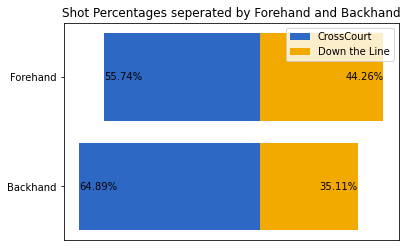

In [15]:
use = data[['shotHitBy', 'shotDirection', 'shotFhBh']]

# Processing
use = use[use['shotHitBy'] == player]
use.dropna(inplace = True)

forehand = use[use['shotFhBh'] == 'Forehand']['shotFhBh'].count()
backhand = use[use['shotFhBh'] == 'Backhand']['shotFhBh'].count()

down = use[use['shotDirection'] == 'Down the Line'].groupby('shotFhBh').size()
cross = use[use['shotDirection'] == 'Crosscourt'].groupby('shotFhBh').size()

cross_plotting = np.array([cross[0], cross[1]])
down_plotting = np.array([down[0], down[1]])

categories = ['Backhand', 'Forehand']

total = cross_plotting + down_plotting

percentage1 = cross_plotting / total * 100
percentage2 = down_plotting / total * 100

fig = plt.figure()
ax = fig.add_subplot()

bars_left = ax.barh(categories, -percentage1, color='#2D68C4', label='CrossCourt', align='center')
bars_right = ax.barh(categories, percentage2, color='#F2AA00', label='Down the Line', align='center')

for bar in bars_left:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{abs(width):.2f}%', ha='left', va='center')

for bar in bars_right:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', ha='right', va='center')

ax.set_xticks([])
ax.set_title('Shot Percentages seperated by Forehand and Backhand')
ax.legend()

plt.show()

Forehand Backhand Percentages

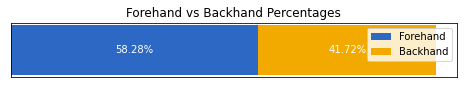

In [16]:
total = forehand + backhand
percentage1 = forehand / total * 100
percentage2 = backhand / total * 100

fig, ax = plt.subplots(figsize=(8, 1))

plt.barh(['Values'], [percentage1], label='Forehand', color='#2D68C4')
plt.barh(['Values'], [percentage2], left=[percentage1], label='Backhand', color='#F2AA00')

plt.text(percentage1 / 2, 0, f'{percentage1:.2f}%', ha='center', va='center', color='white')
plt.text(percentage1 + percentage2 / 2, 0, f'{percentage2:.2f}%', ha='center', va='center', color='white')

plt.yticks([])
plt.xticks([])
plt.title('Forehand vs Backhand Percentages')
plt.legend()

plt.show()

Net Percentages Table

In [17]:
def is_odd(n):
  return n % 2 == 1

def is_even(n):
    return n % 2 == 0

volleys_serve = pd.DataFrame(data.loc[(data["isVolley"] == 1) & (data["serverName"] == player) & (data["shotInRally"].apply(is_odd))])
volleys_return = pd.DataFrame(data.loc[(data["isVolley"] == 1) & (data["serverName"] != player) & (data["shotInRally"].apply(is_even))])
volleys = pd.concat([volleys_serve, volleys_return])
num_volleys = len(volleys)

approach_serve = pd.DataFrame(data.loc[(data["isApproach"] == 1) & (data["serverName"] == player) & (data["shotInRally"].apply(is_odd))])
approach_return = pd.DataFrame(data.loc[(data["isApproach"] == 1) & (data["serverName"] != player) & (data["shotInRally"].apply(is_even))])
approach = approach_serve + approach_return
num_approach = len(approach)

table_fields = ["Field Name", "Statistic"]
table = pd.DataFrame(columns = table_fields)

winner_volleys_serve = pd.DataFrame(data.loc[(data["isVolley"] == 1) & (data["serverName"] == player) & (data["isWinner"] == 1) & (data["shotInRally"].apply(is_odd))])
winner_volleys_return = pd.DataFrame(data.loc[(data["isVolley"] == 1) & (data["serverName"] != player) & (data["isWinner"] == 1) & (data["shotInRally"].apply(is_even))])
winner_volleys = pd.concat([winner_volleys_serve, winner_volleys_return])
num_winner_volleys = len(winner_volleys)

winner_approach_serve = pd.DataFrame(data.loc[(data["isApproach"] == 1) & (data["serverName"] == player) & (data["isWinner"] == 1) & (data["shotInRally"].apply(is_odd))])
winner_approach_return = pd.DataFrame(data.loc[(data["isApproach"] == 1) & (data["serverName"] != player) & (data["isWinner"] == 1) & (data["shotInRally"].apply(is_even))])
winner_approach = pd.concat([winner_approach_serve, winner_approach_return])
num_winner_approach = len(winner_approach)

data1 = ["Number of volleys played", num_volleys]
data2 = ["Number of approach shots played", num_approach]
data3 = ["Volleys as a % of total shots", round((num_volleys/len(data))*100, 3)]
data4 = ["Approach shots as a % of total shots", round((num_approach/len(data))*100, 3)]
data5 = ["Volleys that were winners (%)", round((num_winner_volleys/num_volleys)*100, 3)]
data6 = ["Approach shots that were winners (%)", round((num_winner_approach/num_approach)*100, 3)]

table.loc[len(table)] = data1
table.loc[len(table)] = data2
table.loc[len(table)] = data3
table.loc[len(table)] = data4
table.loc[len(table)] = data5
table.loc[len(table)] = data6

table = table.loc[:5]
table

,Field Name,Statistic
0,Number of volleys played,13
1,Number of approach shots played,12
2,Volleys as a % of total shots,1.752
3,Approach shots as a % of total shots,1.617
4,Volleys that were winners (%),23.077
5,Approach shots that were winners (%),16.667


Winner Table

In [19]:
def is_odd(n):
  return n % 2 == 1

def is_even(n):
    return n % 2 == 0

winners_serve = pd.DataFrame(data.loc[(data["isWinner"] == 1) & (data["serverName"] == player) & (data["shotInRally"].apply(is_odd))])
winners_return = pd.DataFrame(data.loc[(data["isWinner"] == 1) & (data["serverName"] != player) & (data["shotInRally"].apply(is_even))])
winners = pd.concat([winners_return, winners_serve])
winner_percent = (len(winners)/len(data))*100
winner_fh = winners.loc[winners["shotFhBh"] == "Forehand"]
winner_bh = winners.loc[winners["shotFhBh"] == "Backhand"]
winner_fh_pct = (len(winner_fh)/len(winners))*100
winner_bh_pct = (len(winner_bh)/len(winners))*100
winner_percent_list = [winner_percent]

plot_data_winner = pd.DataFrame({
    'Category': ['Winners'],
    'Percentage': [winner_percent]
})

plot_data = pd.DataFrame({
    'Shot Type': ['Forehand', 'Backhand'],
    'Percentage': [winner_fh_pct, winner_bh_pct]
})

print(plot_data_winner)
print(plot_data)

  Category  Percentage
0  Winners    1.212938
  Shot Type  Percentage
0  Forehand   44.444444
1  Backhand   33.333333
